In [4]:
import tensorflow as tf
import matplotlib.pyplot as pyplot
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory

Data Preparation

In [13]:
training_set = image_dataset_from_directory(
    "./dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [14]:
validation_set = image_dataset_from_directory(
    "./dataset/val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [15]:
INPUT_SHAPE = (224,224,3)

In [17]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [21]:
model.add(mobnet)

In [24]:
model.add(tf.keras.layers.Dense(units = 4, activation="softmax"))

In [23]:
metrics_list = ["accuracy",tf.keras.metrics.F1Score()]

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=metrics_list)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [31]:
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=15)

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1977s 827ms/step - accuracy: 0.8931 - f1_score: 0.6897 - loss: 1.0175 - val_accuracy: 0.8606 - val_f1_score: 0.6746 - val_loss: 0.8836
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1899s 794ms/step - accuracy: 0.9051 - f1_score: 0.7564 - loss: 0.7572 - val_accuracy: 0.9555 - val_f1_score: 0.9198 - val_loss: 0.6506
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1927s 806ms/step - accuracy: 0.9546 - f1_score: 0.9208 - loss: 0.5761 - val_accuracy: 0.9410 - val_f1_score: 0.9058 - val_loss: 0.5208
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1977s 826ms/step - accuracy: 0.9597 - f1_score: 0.9305 - loss: 0.4481 - val_accuracy: 0.9631 - val_f1_score: 0.9361 - val_loss: 0.3963
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1979s 827ms/step - accuracy: 0.9633 - f1_score: 0.9371 - loss: 0.3528 - val_accuracy: 0.9618 - val_f1_score: 0.9309 - val_loss: 0.3265
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 1933s 808ms/step - accuracy: 0.9685 - f1_score: 0.9458 - loss: 0.2764 - v

In [34]:
model.save("./Trained_Eye_disease_model.h5")
model.save("./Trained_Eye_disease_model.keras")

In [35]:
#Save history
import pickle 
with open("Training_history.pkl", "wb") as f:
    pickle.dump(training_history.history, f)

In [36]:
#Reloading History from Pickle
import pickle
with open("Training_history.pkl", "rb") as f:
    load_history = pickle.load(f)

print(load_history)


{'accuracy': [0.8931451439857483, 0.9050643444061279, 0.9546493887901306, 0.9597203135490417, 0.9633274674415588, 0.9684898257255554, 0.9725151658058167, 0.976161539554596, 0.979716420173645, 0.9834150075912476, 0.9858328700065613, 0.986747682094574, 0.9885904788970947, 0.9897144436836243, 0.9906684756278992], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.90583336, 0.89555067, 0.        , 0.95751834], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.91303796, 0.9178381 , 0.23237199, 0.9624495 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9606647 , 0.92913187, 0.8134605 , 0.98011476], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9647848 , 0.9345503 , 0.84017825, 0.98247844], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9680213, 0.9410963, 0.8554216, 0.9837952], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9733251 , 0.9532513 , 0.8713121 , 0

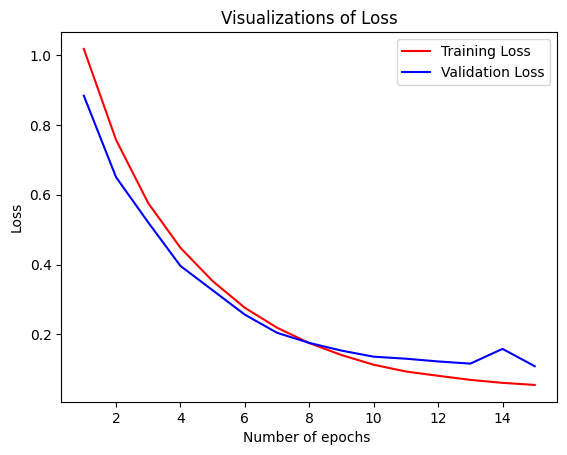

In [39]:
#Loss Visualization
epochs = [i for i in range(1, 16)]
pyplot.plot(epochs, load_history["loss"], color="red", label="Training Loss")
pyplot.plot(epochs, load_history["val_loss"], color="blue", label="Validation Loss")
pyplot.xlabel("Number of epochs ")
pyplot.ylabel("Loss")
pyplot.title("Visualizations of Loss")
pyplot.legend()
pyplot.show()


Model Evaluation

In [41]:
model = tf.keras.models.load_model("Trained_Eye_disease_model.keras")

/Users/smritirangarajan/Desktop/eye-disease-detection/venv/lib/python3.13/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 178 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,998,474 (41.96 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,487,038 (20.93 MB)

In [52]:
test_set = image_dataset_from_directory(
    "./dataset/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10933 files belonging to 4 classes.


In [53]:
test_loss, test_acc, test_f1score = model.evaluate(test_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 49s 144ms/step - accuracy: 0.9729 - f1_score: 0.9533 - loss: 0.1137


In [54]:
test_loss, test_acc, test_f1score

(0.1136685311794281,
 0.9729260206222534,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9771665 , 0.960413  , 0.888265  , 0.98734415], dtype=float32)>)

In [56]:
#Computing True labels from test set
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(10933, 4), dtype=float32)>

In [57]:
Y_true = tf.argmax(true_categories, axis=1)

In [58]:
#Computing Predicted labels using Test Set
predicted_categories = model.predict(test_set)
test_set

342/342 ━━━━━━━━━━━━━━━━━━━━ 50s 147ms/step


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [59]:
Y_pred = tf.argmax(predicted_categories, axis=1)
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], shape=(10933,))>

Classification Report

In [65]:
!pip install scikit-learn
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred))

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 28.3 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 47.3 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3746
           1       0.96      0.96      0.96      1161
           2       0.88      0.89      0.89       887
           3       0.99      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.95      0.95      0.95     10933
weighted avg       0.97      0.97      0.97     10933



Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_pred)
cm

array([[3659,   13,   70,    4],
       [  18, 1116,    2,   25],
       [  60,    3,  791,   33],
       [   6,   31,   31, 5071]])

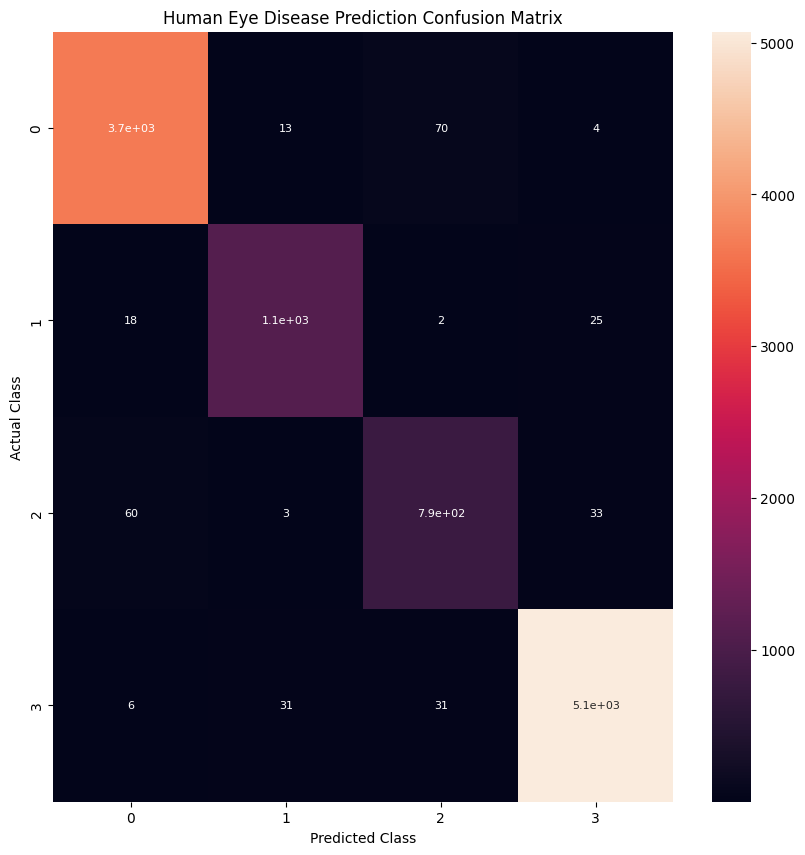

In [69]:
pyplot.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={"size": 8})
pyplot.xlabel("Predicted Class", fontsize=10)
pyplot.ylabel("Actual Class", fontsize=10)
pyplot.title("Human Eye Disease Prediction Confusion Matrix", fontsize=12)
pyplot.show()